#This is a very simple study on the COVID-19 spread in Brazil
#Dataset sources:
#Brazil number from the Brazil Health Ministry: https://covid.saude.gov.br/ (This file needs to be renamed to "covid-brasil.csv"
#Global numbers: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset#covid_19_data.csv

In [1]:
# Import libraries
import numpy as np 
import pandas as pd
from pandas import read_csv

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# Read Data
df_Brazil = pd.read_csv("covid-brasil.csv",sep=';')
df_Brazil

,regiao,estadi,date,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
0,Norte,RO,30/01/2020,0,0,0,0
1,Norte,RO,31/01/2020,0,0,0,0
2,Norte,RO,01/02/2020,0,0,0,0
3,Norte,RO,02/02/2020,0,0,0,0
4,Norte,RO,03/02/2020,0,0,0,0
...,...,...,...,...,...,...,...
1804,Centro-Oeste,DF,01/04/2020,23,355,0,3
1805,Centro-Oeste,DF,02/04/2020,15,370,1,4
1806,Centro-Oeste,DF,03/04/2020,32,402,1,5
1807,Centro-Oeste,DF,04/04/2020,52,454,2,7


In [3]:
#Quick ETL to fix some columns names and data format
df_Brazil = df_Brazil.rename(columns={'estadi':'state'})
df_Brazil['date'] = pd.to_datetime(df_Brazil['date'], format="%d/%m/%Y")
df_Brazil

,regiao,state,date,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
0,Norte,RO,2020-01-30,0,0,0,0
1,Norte,RO,2020-01-31,0,0,0,0
2,Norte,RO,2020-02-01,0,0,0,0
3,Norte,RO,2020-02-02,0,0,0,0
4,Norte,RO,2020-02-03,0,0,0,0
...,...,...,...,...,...,...,...
1804,Centro-Oeste,DF,2020-04-01,23,355,0,3
1805,Centro-Oeste,DF,2020-04-02,15,370,1,4
1806,Centro-Oeste,DF,2020-04-03,32,402,1,5
1807,Centro-Oeste,DF,2020-04-04,52,454,2,7


In [4]:
df_Brazil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809 entries, 0 to 1808
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   regiao            1809 non-null   object        
 1   state             1809 non-null   object        
 2   date              1809 non-null   datetime64[ns]
 3   casosNovos        1809 non-null   int64         
 4   casosAcumulados   1809 non-null   int64         
 5   obitosNovos       1809 non-null   int64         
 6   obitosAcumulados  1809 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 99.1+ KB


In [5]:
df_Brazil.describe()

,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
count,1809.000000,1809.000000,1809.000000,1809.000000
mean,6.152570,45.526258,0.268657,1.546711
std,35.589006,247.657221,1.934696,13.499719
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,6.000000,0.000000,0.000000
max,822.000000,4620.000000,41.000000,275.000000


In [6]:
#Grouping data by Date and State and create a new dataset
df_states = df_Brazil.groupby(['date', 'state']).sum().reset_index().sort_values('date', ascending=True)
df_states = df_states[df_states['casosAcumulados']>0]
df_states

,date,state,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
754,2020-02-26,SP,1,1,0,0
781,2020-02-27,SP,0,1,0,0
808,2020-02-28,SP,0,1,0,0
835,2020-02-29,SP,1,2,0,0
862,2020-03-01,SP,0,2,0,0
...,...,...,...,...,...,...
1783,2020-04-05,AL,5,28,0,2
1782,2020-04-05,AC,2,48,0,0
1807,2020-04-05,SP,154,4620,15,275
1794,2020-04-05,MT,4,60,0,1


In [7]:
df_states.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 627 entries, 754 to 1808
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              627 non-null    datetime64[ns]
 1   state             627 non-null    object        
 2   casosNovos        627 non-null    int64         
 3   casosAcumulados   627 non-null    int64         
 4   obitosNovos       627 non-null    int64         
 5   obitosAcumulados  627 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 34.3+ KB


In [8]:
df_states.describe()

,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
count,627.000000,627.000000,627.00000,627.00000
mean,17.751196,131.350877,0.77512,4.46252
std,58.752733,407.250174,3.22760,22.65648
min,0.000000,1.000000,0.00000,0.00000
25%,1.000000,6.000000,0.00000,0.00000
50%,3.000000,21.000000,0.00000,0.00000
75%,13.000000,95.500000,0.00000,1.00000
max,822.000000,4620.000000,41.00000,275.00000


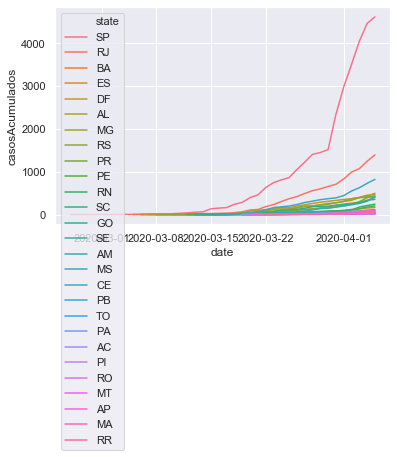

In [9]:
#Ploting data from all states in one graph. No that usefull.
%matplotlib inline
sns.set(style="darkgrid")

dates = df_states['date']
states = df_states['state']
casosAcumulados = df_states['casosAcumulados']

sns.lineplot(x=dates,
             y=casosAcumulados,
             hue=states,
             data=df_states,
             legend='brief'
            )

In [10]:
#Creating a new dataset with the data from São Paulo only
df_SP = df_states[df_states['state']=="SP"]
df_SP

,date,state,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
754,2020-02-26,SP,1,1,0,0
781,2020-02-27,SP,0,1,0,0
808,2020-02-28,SP,0,1,0,0
835,2020-02-29,SP,1,2,0,0
862,2020-03-01,SP,0,2,0,0
889,2020-03-02,SP,0,2,0,0
916,2020-03-03,SP,0,2,0,0
943,2020-03-04,SP,1,3,0,0
970,2020-03-05,SP,3,6,0,0
997,2020-03-06,SP,4,10,0,0


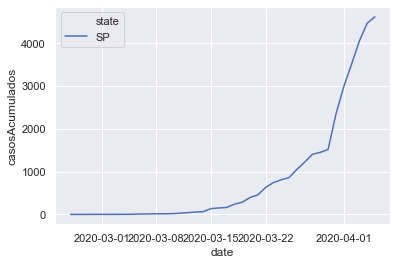

In [11]:
#Plotting confirmed cases in SP state since the first confirmed case
%matplotlib inline
sns.set(style="darkgrid")

datesSP = df_SP['date']
statesSP = df_SP['state']
casosAcumuladosSP = df_SP['casosAcumulados']

sns.lineplot(x=datesSP,
             y=casosAcumuladosSP,
             hue=statesSP,
             data=df_SP,
             legend='brief'
            )

In [12]:
#Creating a new dataset with the global data to have country numbers
df_BRA = pd.read_csv("covid_19_data.csv", usecols=['ObservationDate', 'Country/Region', 'Confirmed'])

In [13]:
#Quick ETL to fix columns names, format date, and keep just the data from "Brazil".
df_BRA = df_BRA.rename(columns={'Country/Region':'Country'})
df_BRA = df_BRA.rename(columns={'ObservationDate':'Date'})
df_BRA = df_BRA[df_BRA['Country']=="Brazil"]
df_BRA['Date'] = pd.to_datetime(df_BRA['Date'], format="%m/%d/%Y")
df_BRA = df_BRA.sort_values('Date').reset_index()
df_BRA

,index,Date,Country,Confirmed
0,82,2020-01-23,Brazil,0.0
1,2455,2020-02-26,Brazil,1.0
2,2559,2020-02-27,Brazil,1.0
3,2668,2020-02-28,Brazil,1.0
4,2776,2020-02-29,Brazil,2.0
5,2903,2020-03-01,Brazil,2.0
6,3032,2020-03-02,Brazil,2.0
7,3173,2020-03-03,Brazil,2.0
8,3322,2020-03-04,Brazil,4.0
9,3486,2020-03-05,Brazil,4.0


In [14]:
#A few info about the new dataset
df_BRA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      41 non-null     int64         
 1   Date       41 non-null     datetime64[ns]
 2   Country    41 non-null     object        
 3   Confirmed  41 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.4+ KB


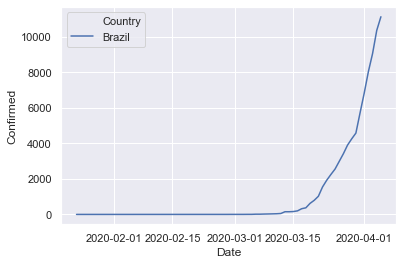

In [15]:
#Plotting confirmed cases from Brazil since its first confirmed case.
%matplotlib inline
sns.set(style="darkgrid")

datesBR = df_BRA['Date']
country = df_BRA['Country']
confirmed = df_BRA['Confirmed']

sns.lineplot(x=datesBR,
             y=confirmed,
             hue=country,
             data=df_BRA,
             legend='brief'
            )

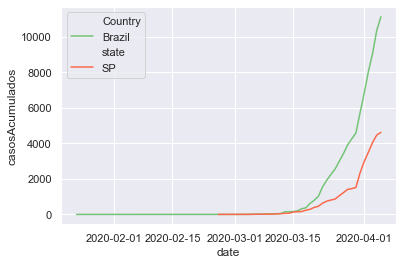

In [16]:
#Ploting confirmed cases in Brazil and SP state
%matplotlib inline
sns.set(style="darkgrid")

datesBR = df_BRA['Date']
country = df_BRA['Country']
confirmed = df_BRA['Confirmed']

datesSP = df_SP['date']
statesSP = df_SP['state']
casosAcumuladosSP = df_SP['casosAcumulados']

sns.lineplot(x=datesBR,
             y=confirmed,
             hue=country,
             data=df_BRA,
             palette= 'Greens'
            )

sns.lineplot(x=datesSP,
             y=casosAcumuladosSP,
             hue=statesSP,
             data=df_SP,
             legend='brief',
             palette= 'Reds'
            )

In [17]:
#Creating a new dataset with the data from Paraná state only
df_PR = df_states[df_states['state']=="PR"]
df_PR

,date,state,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
1151,2020-03-12,PR,6,6,0,0
1178,2020-03-13,PR,0,6,0,0
1205,2020-03-14,PR,0,6,0,0
1232,2020-03-15,PR,0,6,0,0
1259,2020-03-16,PR,0,6,0,0
1286,2020-03-17,PR,0,6,0,0
1313,2020-03-18,PR,7,13,0,0
1340,2020-03-19,PR,10,23,0,0
1367,2020-03-20,PR,9,32,0,0
1394,2020-03-21,PR,11,43,0,0


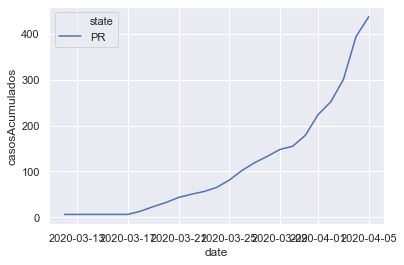

In [18]:
#Plotting confirmed cases in PR state since the first confirmed case
%matplotlib inline
sns.set(style="darkgrid")

datesPR = df_PR['date']
statesPR = df_PR['state']
casosAcumuladosPR = df_PR['casosAcumulados']

sns.lineplot(x=datesPR,
             y=casosAcumuladosPR,
             hue=statesPR,
             data=df_PR
            )

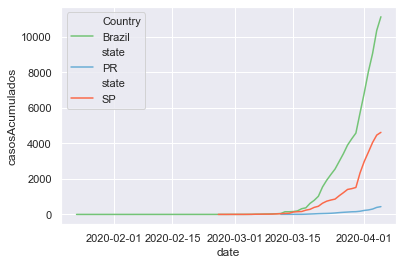

In [19]:
#Ploting confirmed cases in Brazil, SP and PR states
%matplotlib inline
sns.set(style="darkgrid")

datesBR = df_BRA['Date']
country = df_BRA['Country']
confirmed = df_BRA['Confirmed']

sns.lineplot(x=datesBR,
             y=confirmed,
             hue=country,
             data=df_BRA,
             palette= 'Greens'
            )

datesPR = df_PR['date']
statesPR = df_PR['state']
casosAcumuladosPR = df_PR['casosAcumulados']

sns.lineplot(x=datesPR,
             y=casosAcumuladosPR,
             hue=statesPR,
             data=df_PR,
             palette= 'Blues'
            )

datesSP = df_SP['date']
statesSP = df_SP['state']
casosAcumuladosSP = df_SP['casosAcumulados']

sns.lineplot(x=datesSP,
             y=casosAcumuladosSP,
             hue=statesSP,
             data=df_SP,
             palette= 'Reds'
            )